In [1]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [3]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Put data in a pandas DataFrame
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
# Add target and class to DataFrame
df_iris["target"] = iris.target

In [6]:
df_iris.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0
100,6.3,3.3,6.0,2.5,2
40,5.0,3.5,1.3,0.3,0
86,6.7,3.1,4.7,1.5,1
76,6.8,2.8,4.8,1.4,1
71,6.1,2.8,4.0,1.3,1


In [2]:
# Show 10 random samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0
100,6.3,3.3,6.0,2.5,2
40,5.0,3.5,1.3,0.3,0
86,6.7,3.1,4.7,1.5,1
76,6.8,2.8,4.8,1.4,1
71,6.1,2.8,4.0,1.3,1


In [7]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


In [18]:
# same process as always, identify your X's and your y's

X,y = df_iris.iloc[:, 0:4], df_iris['target']
X
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [27]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
y_train.shape

(120,)

In [30]:
# Scale the X's
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [61]:
# apply the lda transformation
model = LinearDiscriminantAnalysis(n_components=2)

In [65]:
X_train_model = model.fit(X_train_scaler,y_train)
X_test_model = model.fit(X_test_scaler,y_test)

In [67]:
# select 2 principal components
X_train_lda = X_train_model.transform(X_train_scaler)
X_test_lda = X_test_model.transform(X_test_scaler)
X_test_lda

array([[-7.68144846,  2.07053769],
       [-2.99344256, -2.75195577],
       [ 9.51622637,  0.68846688],
       [-7.8690057 , -0.96414486],
       [ 7.27007118, -0.29309897],
       [-8.3193695 ,  3.06816466],
       [ 7.57918044, -0.01181674],
       [-3.48436816, -0.65971689],
       [-4.16402615, -1.74813839],
       [-2.34086423, -0.9333275 ],
       [-6.0203324 , -0.25761792],
       [-2.82267422,  0.11163412],
       [-3.26828895, -0.62088829],
       [-4.08150978, -1.09182379],
       [-3.62544329, -0.05870209],
       [ 8.30688351,  0.23313632],
       [-3.56990962,  0.17153337],
       [-3.19024528, -0.06860462],
       [ 6.093752  , -0.84024228],
       [ 8.28137213,  0.34142028],
       [-6.05187026,  1.76856306],
       [-3.24887729,  1.28777799],
       [ 6.58874797,  0.39668825],
       [ 6.1927611 , -0.40122028],
       [-5.3315206 ,  0.12629876],
       [ 8.74355284,  0.75759688],
       [ 6.99232037,  1.11201477],
       [-2.61851809, -0.68449967],
       [-1.35192678,

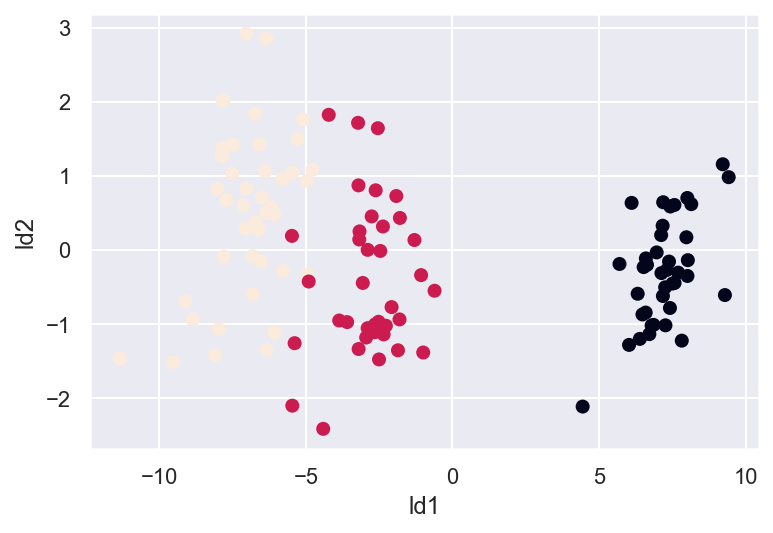

In [78]:
# take a look at the new axes for the data and plot them
plt.xlabel('ld1')
plt.ylabel('ld2')

plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train)
#plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test)
plt.show()


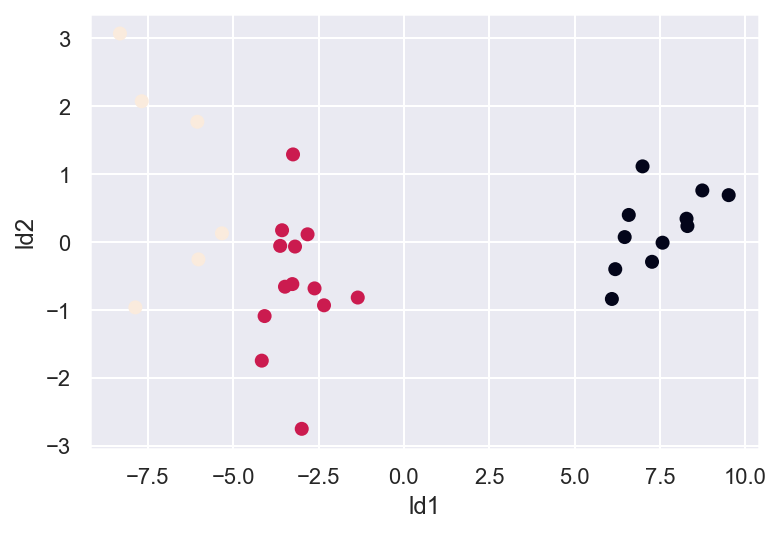

In [77]:
plt.xlabel('ld1')
plt.ylabel('ld2')

#plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train)
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test)
plt.show()


In [75]:
# what about the variability?
print(X_train_model.explained_variance_ratio_)
print(X_test_model.explained_variance_ratio_)

[0.98958472 0.01041528]
[0.98958472 0.01041528]


In [49]:
# Run a Random Forest Classifier with the transformed data
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1

RandomForestClassifier()

In [79]:
X_train_model1 = model1.fit(X_train_scaler,y_train)
X_test_model1 = model1.fit(X_test_scaler,y_test)

In [92]:
X_train_model1.score(X_train_scaler,y_train)

0.9666666666666667

In [95]:
X_test_model1.score(X_test_scaler,y_test)

1.0

In [94]:
train_predictions = model1.predict(X_train_scaler)
train_predictions

array([2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [86]:
(train_predictions == y_train).sum()/len(y_train)

0.9666666666666667

In [88]:
test_predictions = model1.predict(X_test_scaler)
test_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [89]:
(test_predictions == y_test).sum()/len(y_test)

1.0

In [2]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?